In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
labels = ['0', '1','2','3','4','5']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
    

In [ ]:
!unzip '/content/drive/MyDrive/Training/covid infection percent 499/Train-20211227T124202Z-001.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Classified_Images/5/Image_0329.png  
  inflating: Train/Classified_Images/5/Image_0280.png  
  inflating: Train/Classified_Images/5/Image_0295.png  
  inflating: Train/Classified_Images/3/Image_1983.png  
  inflating: Train/Classified_Images/5/Image_0294.png  
  inflating: Train/Classified_Images/5/Image_0293.png  
  inflating: Train/Classified_Images/5/Image_0288.png  
  inflating: Train/Classified_Images/5/Image_0330.png  
  inflating: Train/Classified_Images/5/Image_0444.png  
  inflating: Train/Classified_Images/5/Image_0443.png  
  inflating: Train/Classified_Images/5/Image_0439.png  
  inflating: Train/Classified_Images/5/Image_0292.png  
  inflating: Train/Classified_Images/5/Image_0337.png  
  inflating: Train/Classified_Images/5/Image_0331.png  
  inflating: Train/Classified_Images/5/Image_0433.png  
  inflating: Train/Classified_Images/5/Image_0283.png  
  inflating: Train/Train/Image_2875.png  
  inflating

In [ ]:
import os
len(os.listdir('/content/Train/Classified_Images/0')), \
len(os.listdir('/content/Train/Classified_Images/1')),\
len(os.listdir('/content/Train/Classified_Images/2')),\
len(os.listdir('/content/Train/Classified_Images/3')),\
len(os.listdir('/content/Train/Classified_Images/4')),\
len(os.listdir('/content/Train/Classified_Images/5'))

(735, 1164, 431, 338, 201, 184)

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/covid infection percent 499/Dataset1', output="splitted_data", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 3053 files [00:53, 57.50 files/s] 


In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/covid infection percent 499'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/test/ (stored 0%)
  adding: content/splitted_data/test/2/ (stored 0%)
  adding: content/splitted_data/test/2/Image_1506.png (deflated 3%)
  adding: content/splitted_data/test/2/Image_1704.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_1625.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_2066.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_2810.png (deflated 3%)
  adding: content/splitted_data/test/2/Image_2703.png (deflated 3%)
  adding: content/splitted_data/test/2/Image_2922.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_2618.png (deflated 3%)
  adding: content/splitted_data/test/2/Image_2596.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_1338.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_1550.png (deflated 2%)
  adding: content/splitted_data/test/2/Image_0918.png (deflated 3%)
  adding: content/splitted_data/test/

In [ ]:
!cp '/content/drive/MyDrive/Training/covid infection percent 499/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/test/
   creating: content/splitted_data/test/2/
  inflating: content/splitted_data/test/2/Image_1506.png  
  inflating: content/splitted_data/test/2/Image_1704.png  
  inflating: content/splitted_data/test/2/Image_1625.png  
  inflating: content/splitted_data/test/2/Image_2066.png  
  inflating: content/splitted_data/test/2/Image_2810.png  
  inflating: content/splitted_data/test/2/Image_2703.png  
  inflating: content/splitted_data/test/2/Image_2922.png  
  inflating: content/splitted_data/test/2/Image_2618.png  
  inflating: content/splitted_data/test/2/Image_2596.png  
  inflating: content/splitted_data/test/2/Image_1338.png  
  inflating: content/splitted_data/test/2/Image_1550.png  
  inflating: content/splitted_data/test/2/Image_0918.png  
  inflating: content/splitted_data/test/2/Image_2344.png  
  inflating: content/splitted_data/test/2/Image_1631.png  
  inflating: cont

In [ ]:
!pip install scikit-plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
labels = ['0', '1','2','3','4','5']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/splitted_data/train')
val = get_data('/content/splitted_data/val')
test = get_data('/content/splitted_data/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

x_test=[]
y_test=[]

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test)/255


x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
base_model = ResNet50(input_shape=(128,128,3), 
                   include_top=False,
                   weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 200,batch_size=64 , validation_data = (x_val, y_val))

Epoch 1/200
39/39 [==============================] - 25s 241ms/step - loss: 2.3320 - accuracy: 0.1213 - val_loss: 2.0892 - val_accuracy: 0.0660
Epoch 2/200
39/39 [==============================] - 7s 175ms/step - loss: 2.2855 - accuracy: 0.1238 - val_loss: 1.9408 - val_accuracy: 0.0660
Epoch 3/200
39/39 [==============================] - 7s 175ms/step - loss: 2.2709 - accuracy: 0.1135 - val_loss: 1.8571 - val_accuracy: 0.1056
Epoch 4/200
39/39 [==============================] - 7s 173ms/step - loss: 2.2116 - accuracy: 0.1385 - val_loss: 1.8838 - val_accuracy: 0.1023
Epoch 5/200
39/39 [==============================] - 7s 173ms/step - loss: 2.1448 - accuracy: 0.1533 - val_loss: 1.8800 - val_accuracy: 0.1122
Epoch 6/200
39/39 [==============================] - 7s 172ms/step - loss: 2.0971 - accuracy: 0.1586 - val_loss: 1.8625 - val_accuracy: 0.1089
Epoch 7/200
39/39 [==============================] - 7s 173ms/step - loss: 2.0773 - accuracy: 0.1721 - val_loss: 1.8334 - val_accuracy: 0.122

In [ ]:
scores = model.evaluate(x_test,y_test , verbose=1)

10/10 [==============================] - 2s 144ms/step - loss: 0.6676 - accuracy: 0.8000


In [ ]:
accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

Accuracy:  80.0000011920929
Loss:  0.6675825119018555


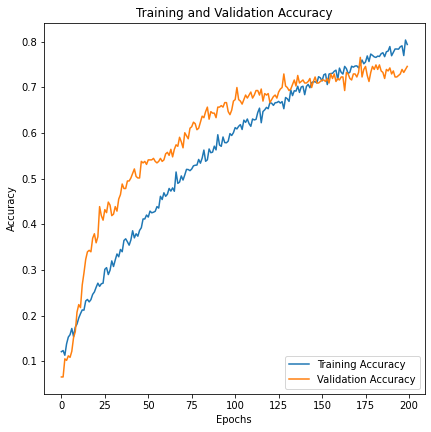

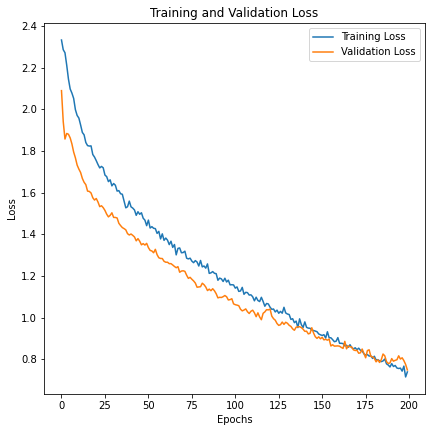

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.title('Training and Validation Accuracy')

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.show()